In [1]:
from main import Model

In [2]:
import pandas as pd
import numpy as np

def apply_target(data_target):
  return np.where(data_target=='M', -1, 1)

model = Model('./dataset/tp1_ej1_training.csv', (1, 11), (0, 1), apply_target)

S: [10, 9, 1]
Máxima #epocas: 1000
LR: 0.01
B (mini-lotes): 1
epoch: 100; error: 93.41446095986223
epoch: 200; error: 61.15879387696922
epoch: 300; error: 43.94055950863758
epoch: 400; error: 34.09407756637341
epoch: 500; error: 28.34057777656488
epoch: 600; error: 25.52377452396522
epoch: 700; error: 23.781201618056006
epoch: 800; error: 22.835644274831992
epoch: 900; error: 22.212734172723486


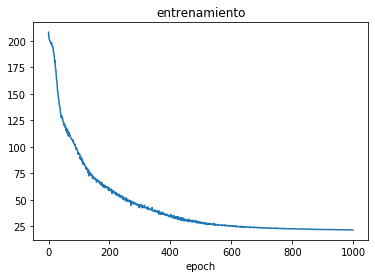

0.815


In [6]:
errors = model.exp(
    [10, 9, 1],
    1000,
    0.01,
    (0, 200),
    (200, 400),
    1
)

S: [10, 10, 10, 1]
Máxima #epocas: 1000
LR: 0.01
B (mini-lotes): 5
epoch: 100; error: 17.616804981676484
epoch: 200; error: 6.022644558295339
epoch: 300; error: 2.8281294008180207
epoch: 400; error: 1.7975587023091324
epoch: 500; error: 1.7023374499283932
epoch: 600; error: 1.6703983567510583
epoch: 700; error: 1.6523359741042296
epoch: 800; error: 1.6412665816440124
epoch: 900; error: 1.63399999825627


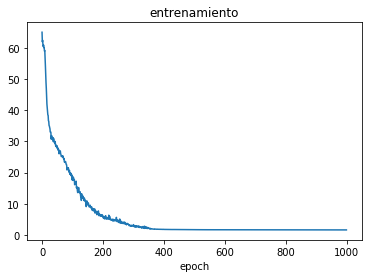

0.9


In [8]:
errors = model.exp(
    [10, 10, 10, 1],
    1000,
    0.01,
    (0, 300),
    (300, 410),
    5
)

S: [10, 10, 10, 1]
Máxima #epocas: 5000
LR: 0.02
B (mini-lotes): 5
epoch: 100; error: 15.946575816633565
epoch: 200; error: 7.4094584839561515
epoch: 300; error: 2.605602605189041
epoch: 400; error: 2.457439837721408
epoch: 500; error: 2.4328506962331957
epoch: 600; error: 2.422845395688652
epoch: 700; error: 2.4173571236120224
epoch: 800; error: 2.4139628999990825
epoch: 900; error: 2.411676448454753
epoch: 1000; error: 2.4100087482490133
epoch: 1100; error: 2.4087610098599566
epoch: 1200; error: 2.4077731687323065
epoch: 1300; error: 2.4069793948588867
epoch: 1400; error: 2.4063322941012295
epoch: 1500; error: 2.405785656504451
epoch: 1600; error: 2.4053264167136743
epoch: 1700; error: 2.4049325735259264
epoch: 1800; error: 2.404595086524959
epoch: 1900; error: 2.4042944692611314
epoch: 2000; error: 2.404029252663194
epoch: 2100; error: 2.403793887485447
epoch: 2200; error: 2.4035851892636964
epoch: 2300; error: 2.4033991027880446
epoch: 2400; error: 2.4032260394652285
epoch: 2500; e

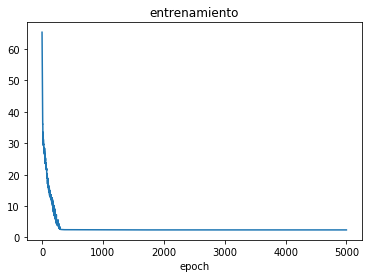

0.9090909090909091


In [10]:
errors = model.exp(
    [10, 10, 10, 1],
    5000,
    0.02,
    (0, 300),
    (300, 410),
    5
)

S: [10, 10, 10, 1]
Máxima #epocas: 1000
LR: 0.01
B (mini-lotes): 5
epoch: 100; error: 19.247262812578438
epoch: 200; error: 3.936832883272054
epoch: 300; error: 0.4933848035897168
epoch: 400; error: 0.17659276288965423
epoch: 500; error: 0.1052121862132876
epoch: 600; error: 0.07387237024438113
epoch: 700; error: 0.0556664959296775
epoch: 800; error: 0.04459424269923924
epoch: 900; error: 0.03704367827179696


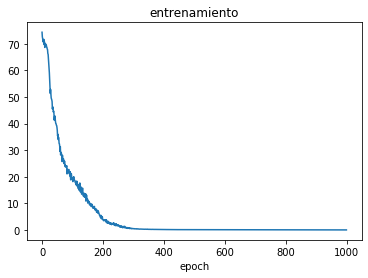

0.8833333333333333


In [11]:
errors = model.exp(
    [10, 10, 10, 1],
    1000,
    0.01,
    (0, 350),
    (350, 410),
    5
)

S: [10, 10, 1]
Máxima #epocas: 5000
LR: 0.02
B (mini-lotes): 5
epoch: 100; error: 21.306972257519377
epoch: 200; error: 13.022849568071837
epoch: 300; error: 9.37892550683803
epoch: 400; error: 8.443100039906714
epoch: 500; error: 8.238420361681538
epoch: 600; error: 8.155178240304817
epoch: 700; error: 8.119377521708008
epoch: 800; error: 8.094339938717463
epoch: 900; error: 8.076318247084846
epoch: 1000; error: 8.064692276372703
epoch: 1100; error: 8.055398254340803
epoch: 1200; error: 8.048379045047083
epoch: 1300; error: 8.042714213779599
epoch: 1400; error: 8.038349041421117
epoch: 1500; error: 8.034731849535575
epoch: 1600; error: 8.031826167998542
epoch: 1700; error: 8.029089922477818
epoch: 1800; error: 8.026889023379837
epoch: 1900; error: 8.024955266643463
epoch: 2000; error: 8.023261937823692
epoch: 2100; error: 8.021781292347615
epoch: 2200; error: 8.020444747643245
epoch: 2300; error: 8.019262656167975
epoch: 2400; error: 8.018228076926215
epoch: 2500; error: 8.01730095917

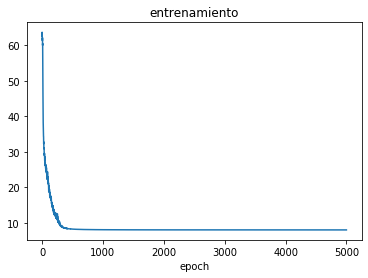

0.8818181818181818


In [13]:
errors = model.exp(
    [10, 10, 1],
    5000,
    0.02,
    (0, 300),
    (300, 410),
    5
)

S: [10, 10, 1]
Máxima #epocas: 5000
LR: 0.01
B (mini-lotes): 5
epoch: 100; error: 26.18651121251673
epoch: 200; error: 18.751930591435304
epoch: 300; error: 14.15528239653637
epoch: 400; error: 11.969241740459626
epoch: 500; error: 10.613153969582024
epoch: 600; error: 10.190228788863346
epoch: 700; error: 9.96840745800444
epoch: 800; error: 9.871743666848026
epoch: 900; error: 9.811410487015205
epoch: 1000; error: 9.776424738520996
epoch: 1100; error: 9.746763685205881
epoch: 1200; error: 9.726332951203682
epoch: 1300; error: 9.709809960434868
epoch: 1400; error: 9.696936614580938
epoch: 1500; error: 9.686527977345158
epoch: 1600; error: 9.678077483551478
epoch: 1700; error: 9.671301568791462
epoch: 1800; error: 9.665398165305342
epoch: 1900; error: 9.66014309563744
epoch: 2000; error: 9.655876599950288
epoch: 2100; error: 9.65197212494022
epoch: 2200; error: 9.648450195010575
epoch: 2300; error: 9.645634016335096
epoch: 2400; error: 9.642949080484344
epoch: 2500; error: 9.64053496752

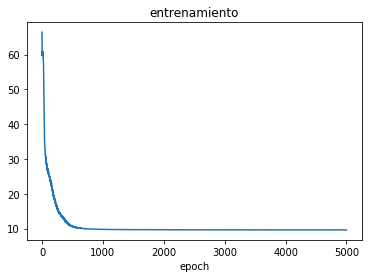

0.8363636363636363


In [14]:
errors = model.exp(
    [10, 10, 1],
    5000,
    0.01,
    (0, 300),
    (300, 410),
    5
)

S: [10, 10, 1]
Máxima #epocas: 5000
LR: 0.01
B (mini-lotes): 10
epoch: 100; error: 13.897303096118465
epoch: 200; error: 11.125358374551809
epoch: 300; error: 8.589769689479127
epoch: 400; error: 7.516160711906879
epoch: 500; error: 6.930103417427641
epoch: 600; error: 6.375497194909547
epoch: 700; error: 6.289153296142813
epoch: 800; error: 6.083260536649059
epoch: 900; error: 5.977144946203989
epoch: 1000; error: 5.881172287923421
epoch: 1100; error: 5.807239233546882
epoch: 1200; error: 5.8013700716741985
epoch: 1300; error: 5.778778296381134
epoch: 1400; error: 5.738874538664048
epoch: 1500; error: 5.715469453734822
epoch: 1600; error: 5.7080288124819925
epoch: 1700; error: 5.69763520548866
epoch: 1800; error: 5.6871268945044156
epoch: 1900; error: 5.675146935128989
epoch: 2000; error: 5.669917808362067
epoch: 2100; error: 5.662651572410546
epoch: 2200; error: 5.659106313295142
epoch: 2300; error: 5.654623388117423
epoch: 2400; error: 5.650305548084698
epoch: 2500; error: 5.6465043

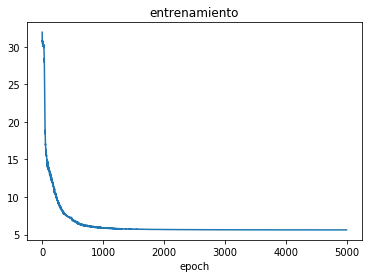

0.8181818181818182


In [15]:
errors = model.exp(
    [10, 10, 1],
    5000,
    0.01,
    (0, 300),
    (300, 410),
    10
)

S: [10, 10, 1]
Máxima #epocas: 5000
LR: 0.01
B (mini-lotes): 3
epoch: 100; error: 41.47942934113534
epoch: 200; error: 30.661753131922133
epoch: 300; error: 23.92667234576576
epoch: 400; error: 21.486638406594494
epoch: 500; error: 19.560798400535713
epoch: 600; error: 18.696187142900172
epoch: 700; error: 18.204290021656934
epoch: 800; error: 15.956255098618405
epoch: 900; error: 15.516293770617402
epoch: 1000; error: 15.300318979335927
epoch: 1100; error: 15.177924824839694
epoch: 1200; error: 15.08899414986015
epoch: 1300; error: 15.023901039784164
epoch: 1400; error: 14.970996660635434
epoch: 1500; error: 14.932166762405354
epoch: 1600; error: 14.902550757777009
epoch: 1700; error: 14.875945654109087
epoch: 1800; error: 14.857072826498865
epoch: 1900; error: 14.83949656232273
epoch: 2000; error: 14.824639906628292
epoch: 2100; error: 14.81154735084211
epoch: 2200; error: 14.800734049963236
epoch: 2300; error: 14.791393963740244
epoch: 2400; error: 14.7826460928948
epoch: 2500; erro

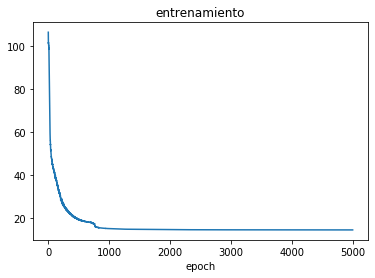

0.8636363636363636


In [16]:
errors = model.exp(
    [10, 10, 1],
    5000,
    0.01,
    (0, 300),
    (300, 410),
    3
)

S: [10, 10, 1]
Máxima #epocas: 5000
LR: 0.01
B (mini-lotes): 1
epoch: 100; error: 89.30289329929896
epoch: 200; error: 55.25393469750384
epoch: 300; error: 34.64509589722285
epoch: 400; error: 22.696418928965997
epoch: 500; error: 15.084280225812368
epoch: 600; error: 11.530622162201473
epoch: 700; error: 9.080344018004773
epoch: 800; error: 7.278350858889132
epoch: 900; error: 6.196428343619465
epoch: 1000; error: 5.576026700686941
epoch: 1100; error: 5.195479875988301
epoch: 1200; error: 4.946616046450596
epoch: 1300; error: 4.790074578806957
epoch: 1400; error: 4.682995774210631
epoch: 1500; error: 4.5933083635390775
epoch: 1600; error: 4.52076894024501
epoch: 1700; error: 4.464672378310062
epoch: 1800; error: 4.421787017345039
epoch: 1900; error: 4.3862035405669495
epoch: 2000; error: 4.352825110579129
epoch: 2100; error: 4.326046793586356
epoch: 2200; error: 4.303344904277238
epoch: 2300; error: 4.283133041341666
epoch: 2400; error: 4.264754579981858
epoch: 2500; error: 4.24911391

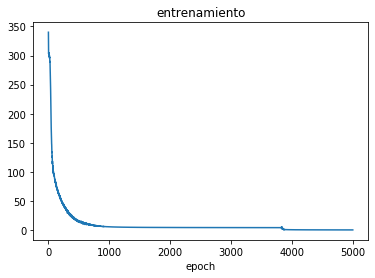

0.8727272727272727


In [17]:
errors = model.exp(
    [10, 10, 1],
    5000,
    0.01,
    (0, 300),
    (300, 410),
    1
)

S: [10, 10, 1]
Máxima #epocas: 5000
LR: 0.01
B (mini-lotes): 6
epoch: 100; error: 20.028870385692624
epoch: 200; error: 7.561755387195901
epoch: 300; error: 4.319210406834236
epoch: 400; error: 2.2072554902654637
epoch: 500; error: 1.0262309774296756
epoch: 600; error: 0.6071686394999006
epoch: 700; error: 0.4370987468763198
epoch: 800; error: 0.31810387195456835
epoch: 900; error: 0.25222587909622385
epoch: 1000; error: 0.20617469658052714
epoch: 1100; error: 0.17338153526772712
epoch: 1200; error: 0.14838238359929287
epoch: 1300; error: 0.13154758022468055
epoch: 1400; error: 0.11653011452407641
epoch: 1500; error: 0.10395526907870206
epoch: 1600; error: 0.09375967670352216
epoch: 1700; error: 0.08478478521091043
epoch: 1800; error: 0.07777176098198292
epoch: 1900; error: 0.07161003812052387
epoch: 2000; error: 0.0660465214495063
epoch: 2100; error: 0.061412577655521106
epoch: 2200; error: 0.05726004368864245
epoch: 2300; error: 0.0536738295756601
epoch: 2400; error: 0.05034511509788

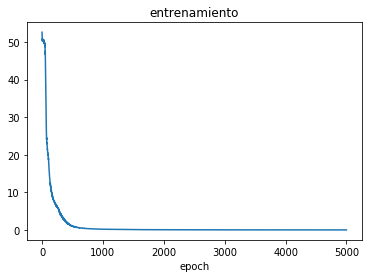

0.9090909090909091


In [20]:
errors = model.exp(
    [10, 10, 1],
    5000,
    0.01,
    (0, 300),
    (300, 410),
    6
)

S: [10, 10, 1]
Máxima #epocas: 5000
LR: 0.01
B (mini-lotes): 7
epoch: 100; error: 20.910805850276347
epoch: 200; error: 6.3854936459556155
epoch: 300; error: 4.245826437367296
epoch: 400; error: 3.0843876915815187
epoch: 500; error: 2.513511629529535
epoch: 600; error: 2.0138070829807
epoch: 700; error: 1.7196318995861597
epoch: 800; error: 1.5697655524882663
epoch: 900; error: 1.4515220320329265
epoch: 1000; error: 1.3609326911969832
epoch: 1100; error: 1.3209872941085645
epoch: 1200; error: 1.2968876768176785
epoch: 1300; error: 1.266512018611244
epoch: 1400; error: 1.2552761577779215
epoch: 1500; error: 1.2432022597796846
epoch: 1600; error: 1.233193905345032
epoch: 1700; error: 1.2244393281774233
epoch: 1800; error: 1.2166910154584336
epoch: 1900; error: 0.6395744034139698
epoch: 2000; error: 1.2040154399505167
epoch: 2100; error: 1.194678489223056
epoch: 2200; error: 1.1969988990788751
epoch: 2300; error: 1.1930435347258475
epoch: 2400; error: 1.1913590989037892
epoch: 2500; error

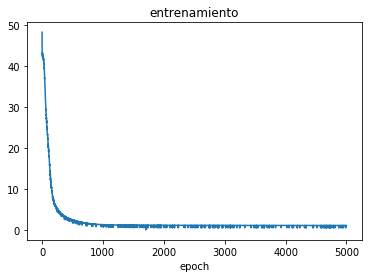

0.8909090909090909


In [3]:
 errors = model.exp(
    [10, 10, 1],
    5000,
    0.01,
    (0, 300),
    (300, 410),
    7
)

S: [10, 10, 10, 1]
Máxima #epocas: 5000
LR: 0.01
B (mini-lotes): 5
epoch: 100; error: 15.479451868637522
epoch: 200; error: 4.714517025409257
epoch: 300; error: 1.010198170349999
epoch: 400; error: 0.20688213377909911
epoch: 500; error: 0.09919325765510766
epoch: 600; error: 0.06489601965386994
epoch: 700; error: 0.0489501390075857
epoch: 800; error: 0.0385522527818824
epoch: 900; error: 0.03029805299574849
epoch: 1000; error: 0.026491278961441468
epoch: 1100; error: 0.023356923152062403
epoch: 1200; error: 0.02043004877271924
epoch: 1300; error: 0.017650096887974233
epoch: 1400; error: 0.016543736005756773
epoch: 1500; error: 0.015239951400569851
epoch: 1600; error: 0.013945655701521986
epoch: 1700; error: 0.01262125277021784
epoch: 1800; error: 0.011951716375466388
epoch: 1900; error: 0.010933357018642769
epoch: 2000; error: 0.010518346187494653
epoch: 2100; error: 0.009901645014820127
epoch: 2200; error: 0.009249729465627052
epoch: 2300; error: 0.008073500944613364
epoch: 2400; erro

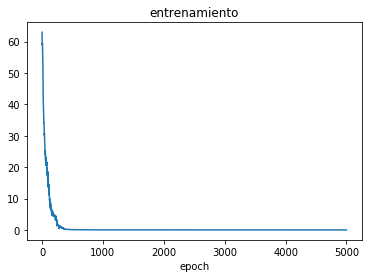

0.9


In [4]:
errors = model.exp(
    [10, 10, 10, 1],
    5000,
    0.01,
    (0, 300),
    (300, 410),
    5
)

S: [10, 10, 10, 1]
Máxima #epocas: 10000
LR: 0.01
B (mini-lotes): 5
epoch: 100; error: 18.5855658454666
epoch: 200; error: 5.834655858951206
epoch: 300; error: 2.4480450908444054
epoch: 400; error: 0.3437821997395172
epoch: 500; error: 0.13283223062894342
epoch: 600; error: 0.08671193578792102
epoch: 700; error: 0.06157120289888137
epoch: 800; error: 0.04888335648052415
epoch: 900; error: 0.040165961056193314
epoch: 1000; error: 0.03347727764350854
epoch: 1100; error: 0.02849739492993753
epoch: 1200; error: 0.026143574962716125
epoch: 1300; error: 0.023059429199742926
epoch: 1400; error: 0.02072775963383495
epoch: 1500; error: 0.018903865622994672
epoch: 1600; error: 0.017464633131173156
epoch: 1700; error: 0.015969767462583117
epoch: 1800; error: 0.014690793271482119
epoch: 1900; error: 0.013519555820664123
epoch: 2000; error: 0.012913932504258204
epoch: 2100; error: 0.012247089008784542
epoch: 2200; error: 0.011312450910962599
epoch: 2300; error: 0.010901054903375472
epoch: 2400; err

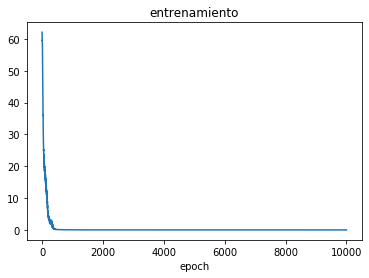

0.9090909090909091


In [7]:
errors = model.exp(
    [10, 10, 10, 1],
    10000,
    0.01,
    (0, 300),
    (300, 410),
    5
)

In [ ]:
errors = model.exp(
    [10, 10, 10, 1],
    15000,
    0.01,
    (0, 300),
    (300, 410),
    5
)

S: [10, 10, 10, 1]
Máxima #epocas: 15000
LR: 0.01
B (mini-lotes): 5
epoch: 100; error: 21.72636366488162
epoch: 200; error: 4.513719899914883
epoch: 300; error: 3.375741089497164
epoch: 400; error: 0.5253470270384821
epoch: 500; error: 0.12920514370637387
epoch: 600; error: 0.07688069554330296
epoch: 700; error: 0.0546438850866338
epoch: 800; error: 0.0415896047220916
epoch: 900; error: 0.033480981189881104
epoch: 1000; error: 0.028158536923355227
epoch: 1100; error: 0.02377611439419308
epoch: 1200; error: 0.019798602907985213
epoch: 1300; error: 0.017726423822502176
epoch: 1400; error: 0.016660429356763422
epoch: 1500; error: 0.015084256717711764
epoch: 1600; error: 0.013656696345349256
epoch: 1700; error: 0.011420414184377139
epoch: 1800; error: 0.011351946553345215
epoch: 1900; error: 0.010852467240096529
epoch: 2000; error: 0.01014347397603236
epoch: 2100; error: 0.008944593607461773
epoch: 2200; error: 0.00894569474370054
epoch: 2300; error: 0.008181228262745133
epoch: 2400; error